### Домашнее задание по линейной регрессии
Итак, в качестве домашнего заданиия вам предстоит:
1. Воспользоваться [ноутбуком](pandas_2.ipynb).
2. Нормализовать данные. В идеале - 3-мя способами: лога    рифмом, минимаксом и методом, рассмотренным на последней лекции: вычитаним среднего и делением на вариацию. Потом нужно будет сравнить, какой способ дал лучший результат.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')




In [2]:
y_train = df_train['SalePrice']


<AxesSubplot:>

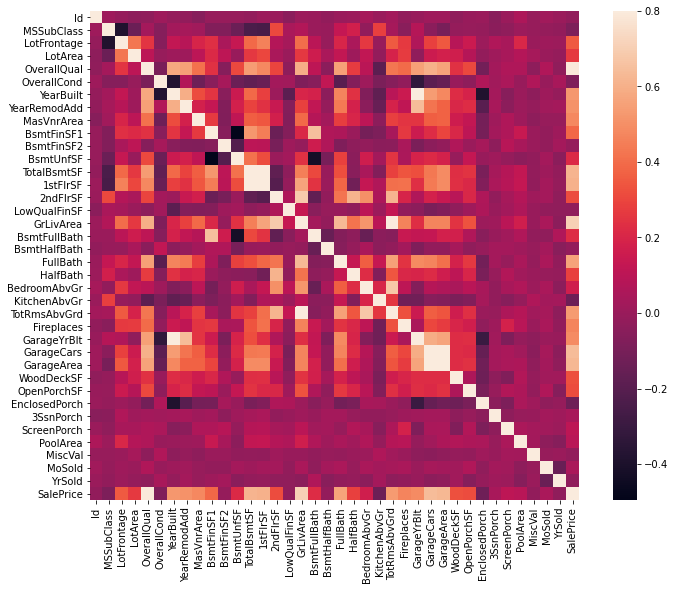

In [3]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:>

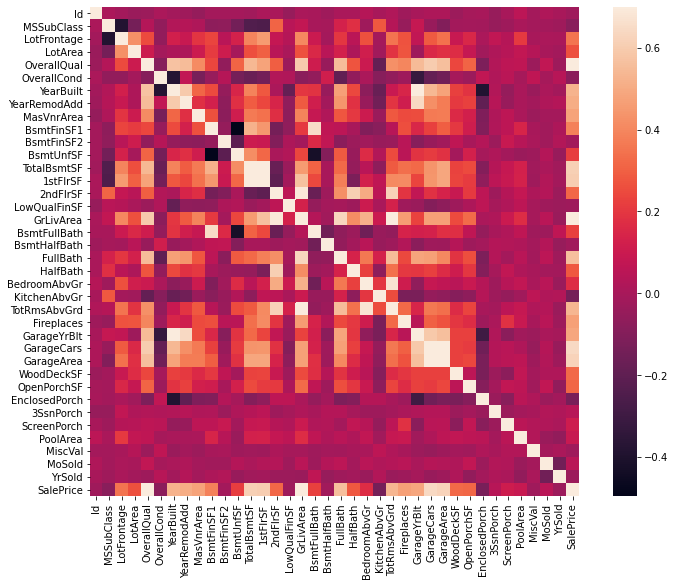

In [5]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.7, square=True)

In [9]:
f1 = corrmat['SalePrice'][corrmat['SalePrice'] > 0.7]
f1


OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [11]:
f2 = corrmat['SalePrice'][corrmat['SalePrice'] > 0.6]
f2

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [12]:
cols_1 = f1.index
cols_2 = f2.index

In [34]:
X = df_train[cols_2]
X

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,460,175000
1456,6,1542,2073,2073,2,500,210000
1457,7,1152,1188,2340,1,252,266500
1458,5,1078,1078,1078,1,240,142125


Проверка на наличие пропусков в нужных столбцах. 


In [35]:
X.isna().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

Проверка признаков на выбросы

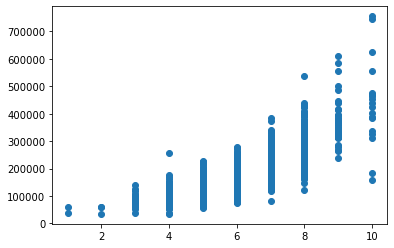

In [36]:
ig, ax = plt.subplots()
ax.scatter(x = X['OverallQual'], y = X['SalePrice'])

In [37]:
X = X.drop(X[(X['OverallQual']>9) & (X['SalePrice']<250000)].index)

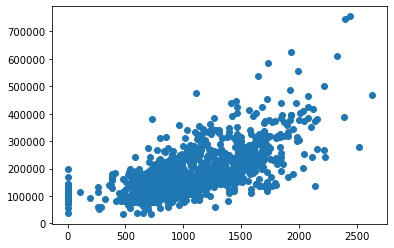

In [43]:
g, ax = plt.subplots()
ax.scatter(x = X['TotalBsmtSF'], y = X['SalePrice'])

In [49]:
X = X.drop(X[(X['TotalBsmtSF']>4000)].index)


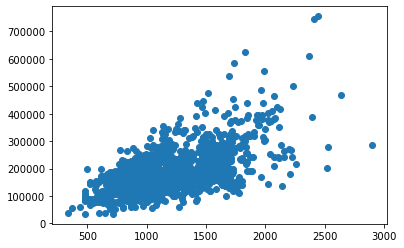

In [50]:
g, ax = plt.subplots()
ax.scatter(x = X['1stFlrSF'], y = X['SalePrice'])

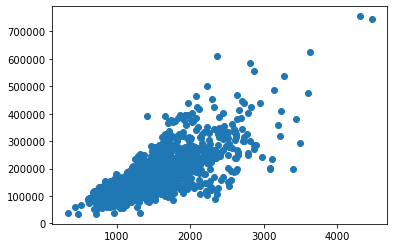

In [51]:
ig, ax = plt.subplots()
ax.scatter(x = X['GrLivArea'], y = X['SalePrice'])

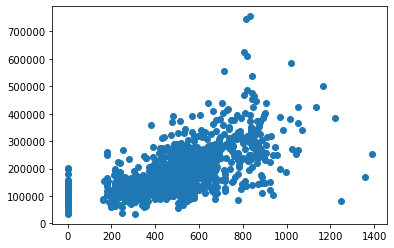

In [52]:
ig, ax = plt.subplots()
ax.scatter(x = X['GarageArea'], y = X['SalePrice'])

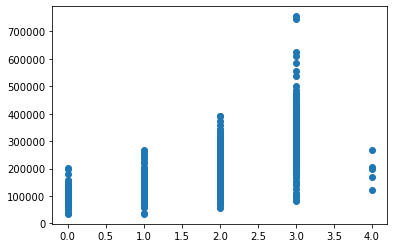

In [53]:
ig, ax = plt.subplots()
ax.scatter(x = X['GarageCars'], y = X['SalePrice'])

In [56]:
X


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,460,175000
1456,6,1542,2073,2073,2,500,210000
1457,7,1152,1188,2340,1,252,266500
1458,5,1078,1078,1078,1,240,142125


In [57]:
# нормализация мин-макс
def norm_minmax(ds):
    return ds.apply(lambda x: (x - ds.min())/(ds.max()-ds.min()))

# Нормализация z-масштабирование 
def norm_z(ds):
    dispers = ds.std()
    ds = ds.apply(lambda x: (x - ds.mean())/(dispers**2))
    return  ds + abs(ds.min())

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


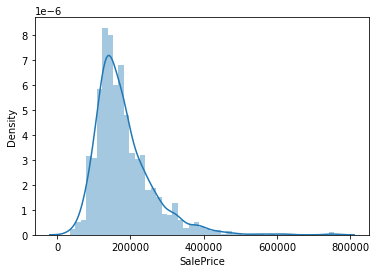

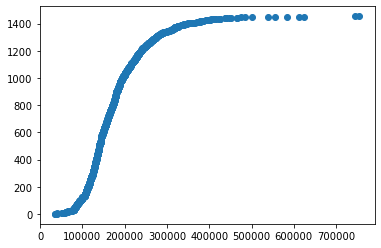

In [58]:
sns.distplot(X['SalePrice'])
ig, ax = plt.subplots()
ax.scatter(x = X['SalePrice'].sort_values(ascending=True).reset_index(drop=True), y = X['SalePrice'].sort_values(ascending=False).reset_index(drop=True).index)

In [59]:
var = X['SalePrice']
var_log = np.log1p(var)
var_minmax = norm_minmax(var)
var_z = norm_z(var)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


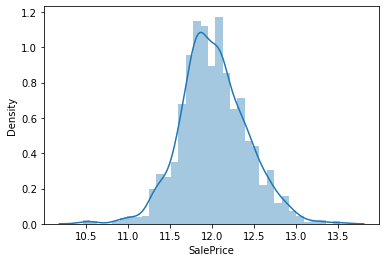

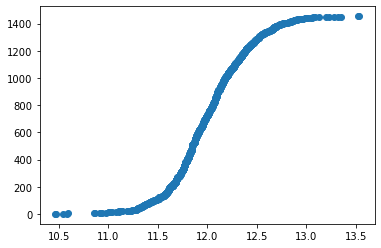

In [69]:
sns.distplot(var_log)
ig, ax = plt.subplots()
ax.scatter(x = var_log.sort_values(ascending=True).reset_index(drop=True), y = var_log.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


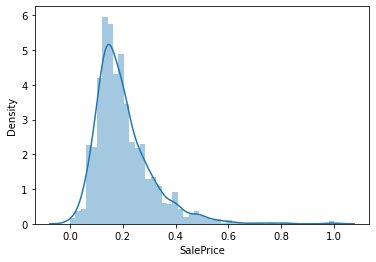

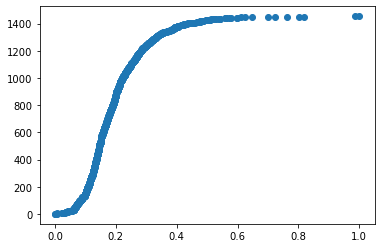

In [65]:
sns.distplot(var_minmax)
g, ax = plt.subplots()
ax.scatter(x = var_minmax.sort_values(ascending=True).reset_index(drop=True), y = var_minmax.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


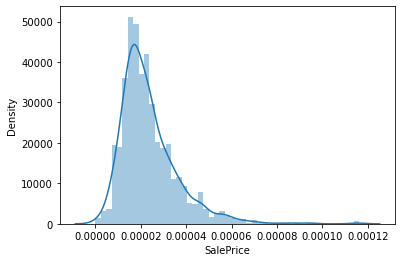

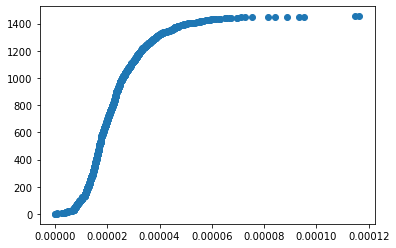

In [66]:
sns.distplot(var_z)
g, ax = plt.subplots()
ax.scatter(x = var_z.sort_values(ascending=True).reset_index(drop=True), y = var_z.sort_values(ascending=False).reset_index(drop=True).index)

Логарифмирование позволило приблизить цены ближе к центру

In [70]:
X['SalePrice'] = var_log

OverQual

In [71]:
var = X['OverallQual']
var_log = np.log1p(var)
var_minmax = norm_minmax(var)
var_z = norm_z(var)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


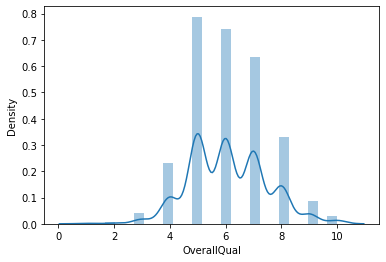

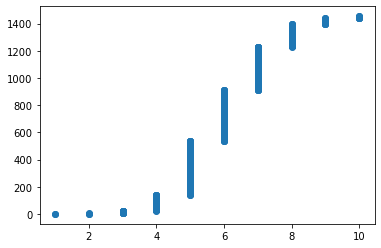

In [78]:
sns.distplot(var)
g, ax = plt.subplots()
ax.scatter(x = var.sort_values(ascending=True).reset_index(drop=True), y = var.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


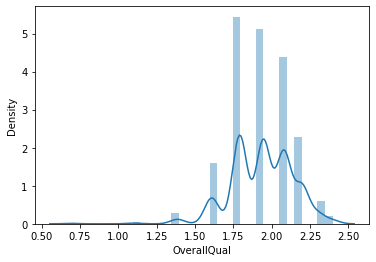

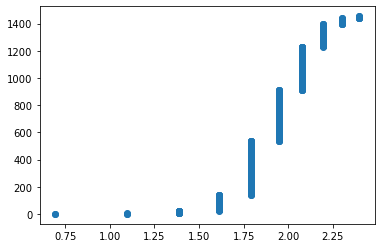

In [79]:
sns.distplot(var_log)
g, ax = plt.subplots()
ax.scatter(x = var_log.sort_values(ascending=True).reset_index(drop=True), y = var_log.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


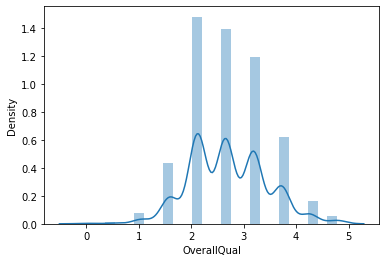

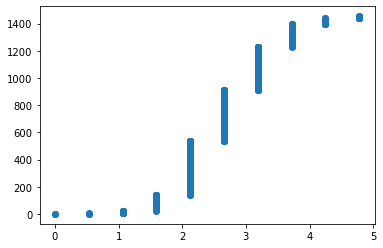

In [80]:
sns.distplot(var_z)
g, ax = plt.subplots()
ax.scatter(x = var_z.sort_values(ascending=True).reset_index(drop=True), y = var_z.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


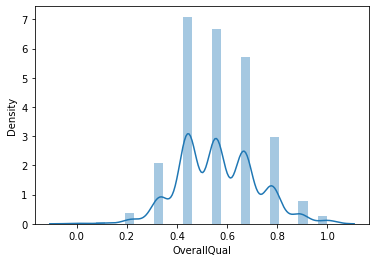

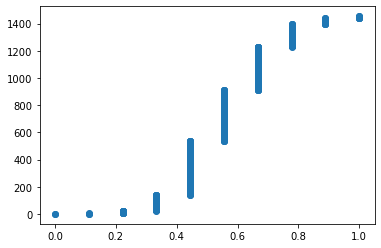

In [81]:
sns.distplot(var_minmax)
g, ax = plt.subplots()
ax.scatter(x = var_minmax.sort_values(ascending=True).reset_index(drop=True), y = var_minmax.sort_values(ascending=False).reset_index(drop=True).index)

In [82]:
X['OverallQual'] = var_z

TotalBsmtSF	

In [83]:
var = X['TotalBsmtSF']
var_log = np.log1p(var)
var_minmax = norm_minmax(var)
var_z = norm_z(var)


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


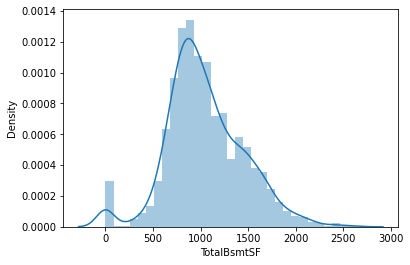

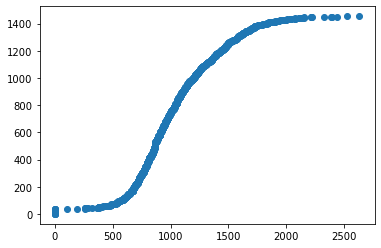

In [84]:
sns.distplot(var)
g, ax = plt.subplots()
ax.scatter(x = var.sort_values(ascending=True).reset_index(drop=True), y = var.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


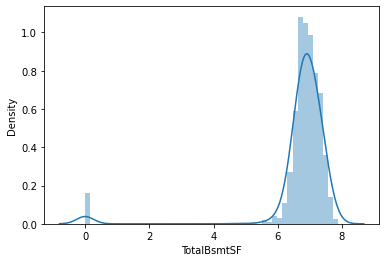

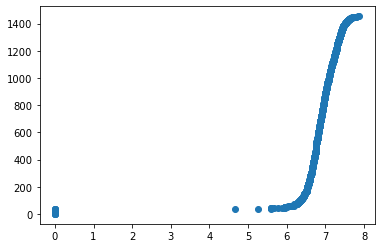

In [85]:
sns.distplot(var_log)
g, ax = plt.subplots()
ax.scatter(x = var_log.sort_values(ascending=True).reset_index(drop=True), y = var_log.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


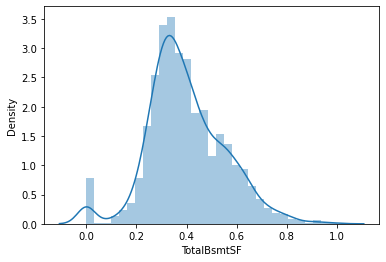

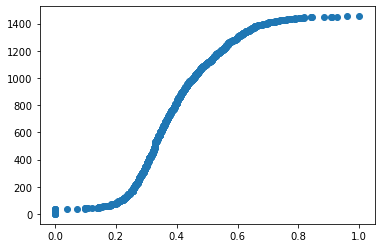

In [86]:
sns.distplot(var_minmax)
g, ax = plt.subplots()
ax.scatter(x = var_minmax.sort_values(ascending=True).reset_index(drop=True), y = var_minmax.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


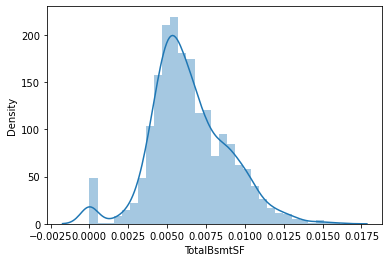

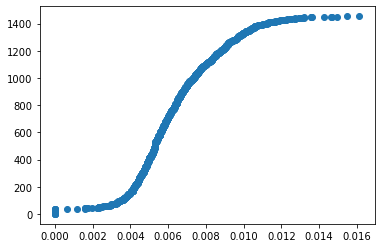

In [87]:
sns.distplot(var_z)
g, ax = plt.subplots()
ax.scatter(x = var_z.sort_values(ascending=True).reset_index(drop=True), y = var_z.sort_values(ascending=False).reset_index(drop=True).index)

In [ ]:
X['TotalBsmtSF'] = var_minmax

1stFlrSF

In [ ]:
var = X['1stFlrSF']
var_log = np.log1p(var)
var_minmax = norm_minmax(var)
var_z = norm_z(var)


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


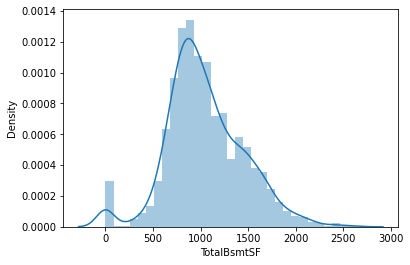

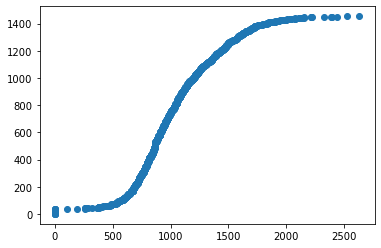

In [88]:
sns.distplot(var)
g, ax = plt.subplots()
ax.scatter(x = var.sort_values(ascending=True).reset_index(drop=True), y = var.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


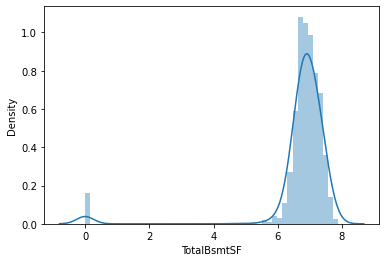

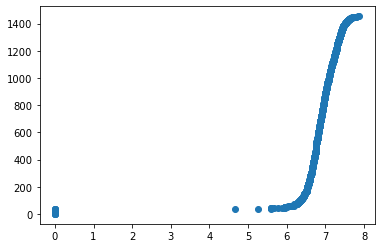

In [89]:
sns.distplot(var_log)
g, ax = plt.subplots()
ax.scatter(x = var_log.sort_values(ascending=True).reset_index(drop=True), y = var_log.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


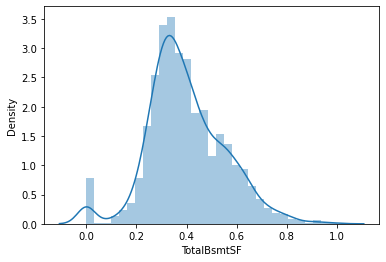

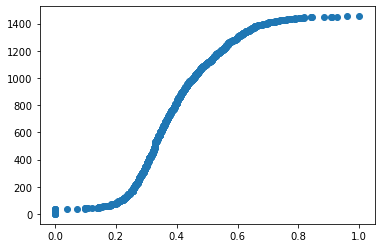

In [90]:
sns.distplot(var_minmax)
g, ax = plt.subplots()
ax.scatter(x = var_minmax.sort_values(ascending=True).reset_index(drop=True), y = var_minmax.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


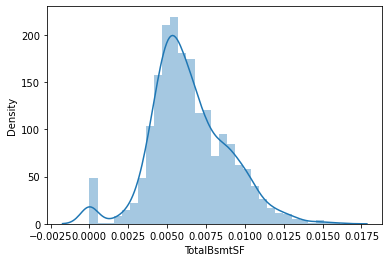

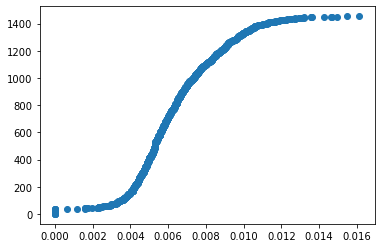

In [91]:
sns.distplot(var_z)
g, ax = plt.subplots()
ax.scatter(x = var_z.sort_values(ascending=True).reset_index(drop=True), y = var_z.sort_values(ascending=False).reset_index(drop=True).index)

In [95]:
X['TotalBsmtSF'] = var_minmax

1stFlrSF

In [96]:
var = X['1stFlrSF']
var_log = np.log1p(var)
var_minmax = norm_minmax(var)
var_z = norm_z(var)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


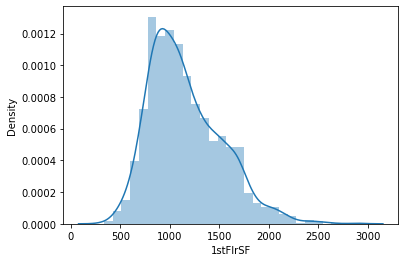

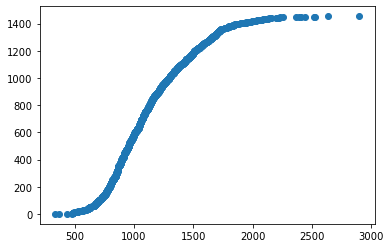

In [97]:
sns.distplot(var)
ig, ax = plt.subplots()
ax.scatter(x = var.sort_values(ascending=True).reset_index(drop=True), y = var.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


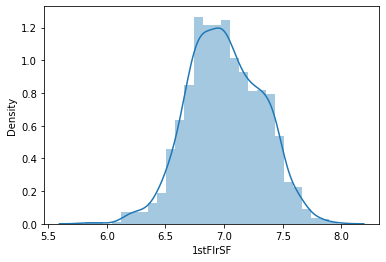

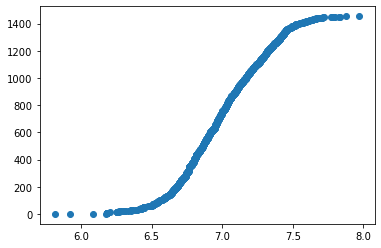

In [98]:
sns.distplot(var_log)
ig, ax = plt.subplots()
ax.scatter(x = var_log.sort_values(ascending=True).reset_index(drop=True), y = var_log.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


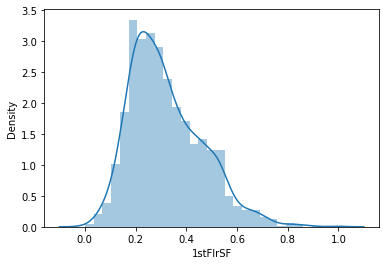

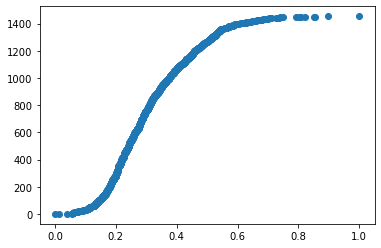

In [99]:
sns.distplot(var_minmax)
ig, ax = plt.subplots()
ax.scatter(x = var_minmax.sort_values(ascending=True).reset_index(drop=True), y = var_minmax.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


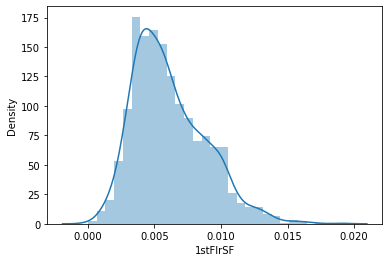

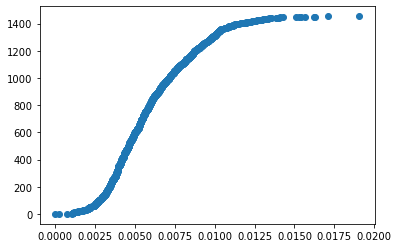

In [100]:
sns.distplot(var_z)
ig, ax = plt.subplots()
ax.scatter(x = var_z.sort_values(ascending=True).reset_index(drop=True), y = var_z.sort_values(ascending=False).reset_index(drop=True).index)

In [101]:
X['1stFlrSF'] = var_log

GrLivArea

In [102]:
var = X['GrLivArea']
var_log = np.log1p(var)
var_minmax = norm_minmax(var)
var_z = norm_z(var)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


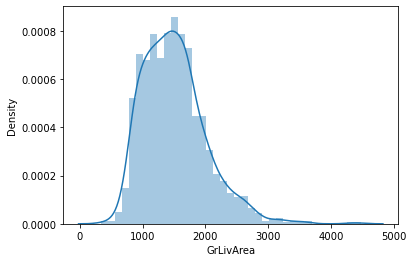

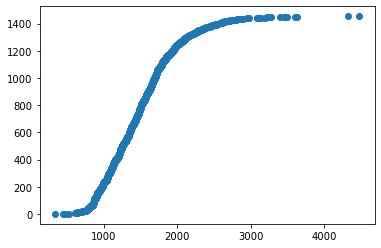

In [103]:
sns.distplot(var)
ig, ax = plt.subplots()
ax.scatter(x = var.sort_values(ascending=True).reset_index(drop=True), y = var.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


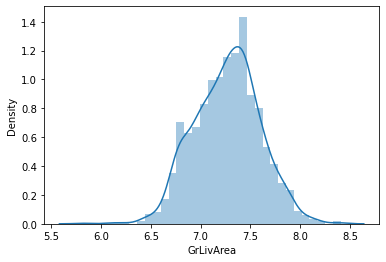

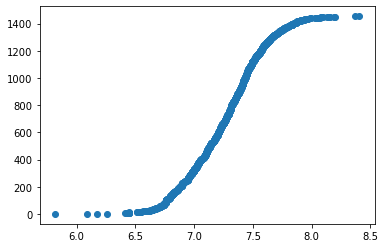

In [104]:
sns.distplot(var_log)
ig, ax = plt.subplots()
ax.scatter(x = var_log.sort_values(ascending=True).reset_index(drop=True), y = var_log.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


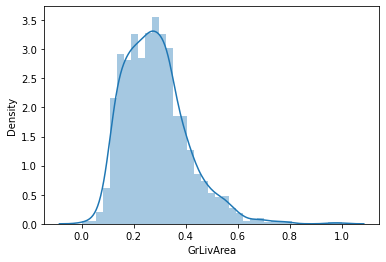

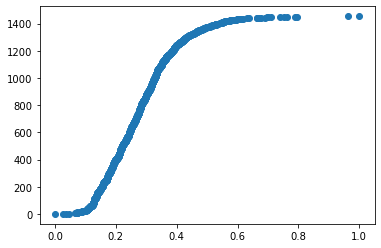

In [105]:
sns.distplot(var_minmax)
ig, ax = plt.subplots()
ax.scatter(x = var_minmax.sort_values(ascending=True).reset_index(drop=True), y = var_minmax.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


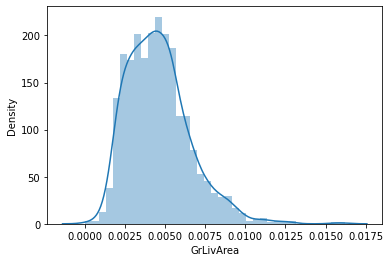

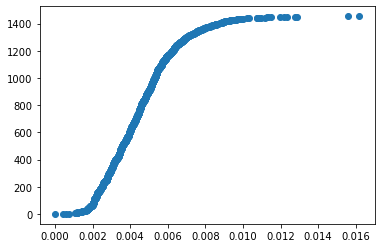

In [106]:
sns.distplot(var_z)
ig, ax = plt.subplots()
ax.scatter(x = var_z.sort_values(ascending=True).reset_index(drop=True), y = var_z.sort_values(ascending=False).reset_index(drop=True).index)

In [107]:
X['1stFlrSF'] = var_log

GarageCars

In [108]:
var = X['GarageCars']
var_log = np.log1p(var)
var_minmax = norm_minmax(var)
var_z = norm_z(var)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


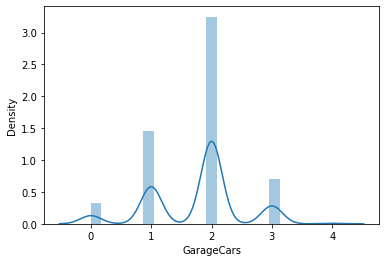

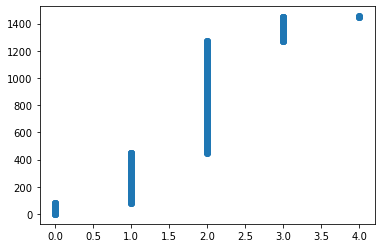

In [109]:
sns.distplot(var)
ig, ax = plt.subplots()
ax.scatter(x = var.sort_values(ascending=True).reset_index(drop=True), y = var.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


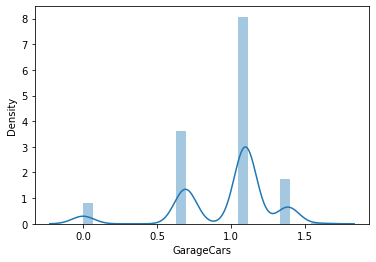

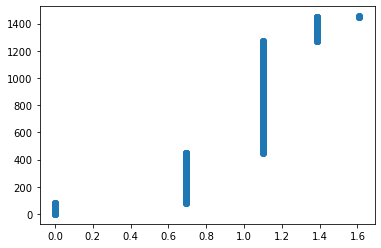

In [110]:
sns.distplot(var_log)
ig, ax = plt.subplots()
ax.scatter(x = var_log.sort_values(ascending=True).reset_index(drop=True), y = var_log.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


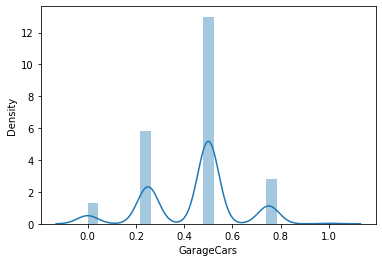

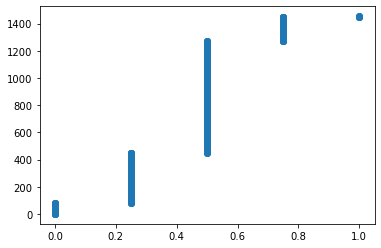

In [111]:
sns.distplot(var_minmax)
ig, ax = plt.subplots()
ax.scatter(x = var_minmax.sort_values(ascending=True).reset_index(drop=True), y = var_minmax.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


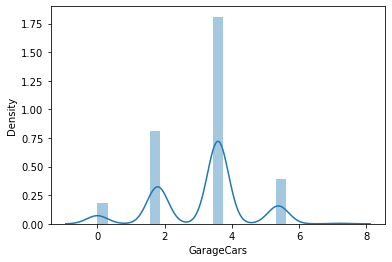

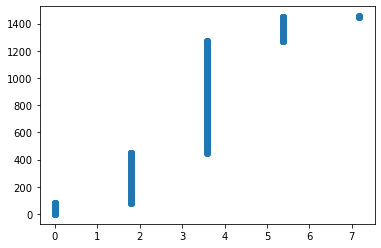

In [112]:
sns.distplot(var_z)
ig, ax = plt.subplots()
ax.scatter(x = var_z.sort_values(ascending=True).reset_index(drop=True), y = var_z.sort_values(ascending=False).reset_index(drop=True).index)

In [113]:
X['GarageCars'] = var_minmax

GarageArea

In [114]:
var = X['GarageArea']
var_log = np.log1p(var)
var_minmax = norm_minmax(var)
var_z = norm_z(var)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


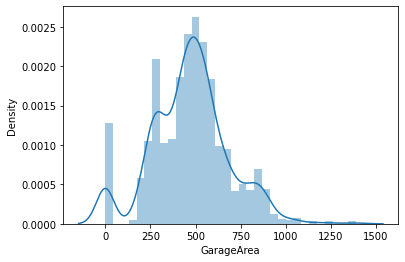

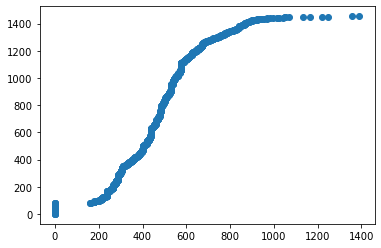

In [116]:
sns.distplot(var)
ig, ax = plt.subplots()
ax.scatter(x = var.sort_values(ascending=True).reset_index(drop=True), y = var.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


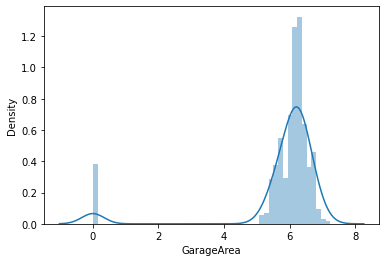

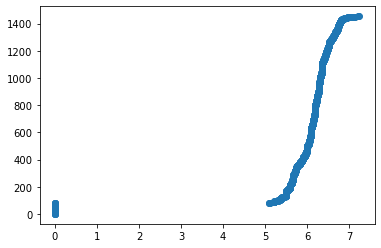

In [117]:
sns.distplot(var_log)
ig, ax = plt.subplots()
ax.scatter(x = var_log.sort_values(ascending=True).reset_index(drop=True), y = var_log.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


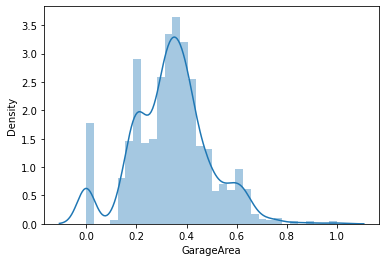

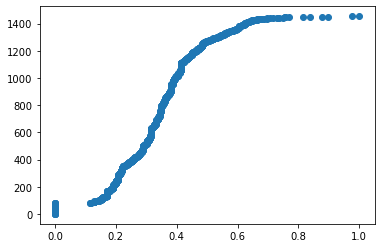

In [118]:
sns.distplot(var_minmax)
ig, ax = plt.subplots()
ax.scatter(x = var_minmax.sort_values(ascending=True).reset_index(drop=True), y = var_minmax.sort_values(ascending=False).reset_index(drop=True).index)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


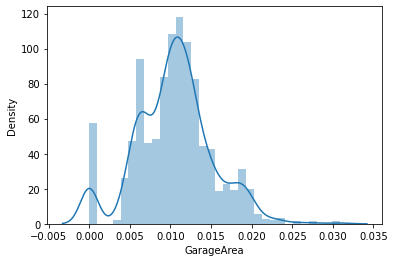

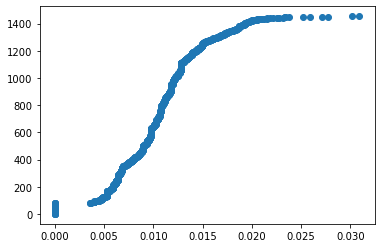

In [119]:
sns.distplot(var_z)
ig, ax = plt.subplots()
ax.scatter(x = var_z.sort_values(ascending=True).reset_index(drop=True), y = var_z.sort_values(ascending=False).reset_index(drop=True).index)

In [120]:
X['GarageArea'] = var_log

In [121]:
y = X['SalePrice']
X = X.drop('SalePrice', 1)

In [122]:
X

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,3.186776,0.325104,7.444833,1710,0.50,6.308098
1,2.655647,0.479301,7.141245,1262,0.50,6.133398
2,3.186776,0.349411,7.488294,1786,0.50,6.411818
3,3.186776,0.287125,7.448916,1717,0.75,6.466145
4,3.717905,0.434865,7.695758,2198,0.75,6.729824
...,...,...,...,...,...,...
1455,2.655647,0.361945,7.407318,1647,0.50,6.133398
1456,2.655647,0.585644,7.637234,2073,0.50,6.216606
1457,3.186776,0.437524,7.758333,2340,0.25,5.533389
1458,2.124517,0.409419,6.983790,1078,0.25,5.484797


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [135]:
def  cost(w, X, y):
    N = len(y)
    predictions = X.dot(w)
    cost = (1/2*N) * np.sum(np.square(predictions-y))
    return cost

In [140]:
def gradient_descent(X, y, w, learning_rate=0.002, iterations=10000):
    N = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = np.dot(X,w)
        w = w -(1/N)*learning_rate*( X.T.dot((prediction - y)))
        cost_history[it]  = cost(w, X, y)

    return w, cost_history

In [141]:
ones = [[1]]*X.shape[0]

In [142]:
X_train_1, X_test_1 = X_train[cols_1[:-1]], X_test[cols_1[:-1]]
X_train_2, X_test_2 = X_train, X_test

In [143]:
ones = [[1]]*X_train_1.shape[0]
X_train_1 = np.hstack((ones, X_train_1))
X_train_2 = np.hstack((ones, X_train_2))
ones = [[1]]*X_test_1.shape[0]
X_test_1 = np.hstack((ones, X_test_1))
X_test_2 = np.hstack((ones, X_test_2))

In [144]:
w = [np.random.random(), np.random.random(), np.random.random()]
w, cost_history = gradient_descent(X_train_1,  y_train, w)

print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

ValueError: shapes (1018,7) and (3,) not aligned: 7 (dim 1) != 3 (dim 0)

In [146]:
prediction = np.dot(X_train_1,w)

var_data = np.sum(np.square(y_train - y_train.mean()))

var_res = np.sum(np.square(prediction - y_train))

var_reg = np.sum(np.square(prediction - y_train.mean()))

ValueError: shapes (1018,7) and (3,) not aligned: 7 (dim 1) != 3 (dim 0)

<ipython-input-150-670326b62041>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


NameError: name 'prediction' is not defined

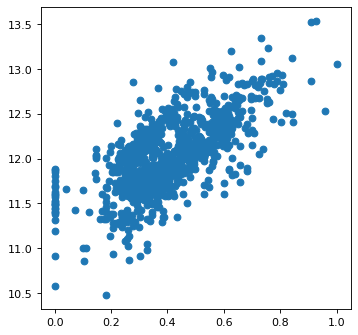

In [150]:
df = np.array(X_train_1)
fig = plt.figure(figsize=(5, 5), dpi=80)
ax = fig.add_subplot()
ax.scatter(df.T[2], y_train)
ax = fig.add_subplot()
ax.scatter(df.T[2], prediction)